LINEAR REGRESSION MODEL - COMPLETE EXECUTION

📦 STEP 1: LOADING AND PREPARING DATA
--------------------------------------------------
✓ Dataset loaded successfully
  Shape: 550 rows × 41 columns

📊 Dataset Information:
  Columns: 41
  Missing values: 0
  Memory usage: 0.40 MB

🎯 STEP 2: SELECTING TARGET AND FEATURES
--------------------------------------------------
✓ Target variable selected: 'combination_mpg'
  Target range: 14.0 to 112.0
  Target mean: 24.07 ± 7.48
✓ Features selected: 32 features

📐 Data dimensions:
  Features (X): (550, 32)
  Target (y): (550,)

🔧 STEP 3: DATA CLEANING AND PREPROCESSING
--------------------------------------------------
✓ No missing values found
⚠  Found 9 non-numeric columns: ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission', 'size_category', 'drivetrain_type', 'fuel_efficiency_category']
  Converting to numeric...
⚠  Removing 8 constant columns: ['class', 'drive', 'fuel_type', 'make', 'transmission', 'size_category', 'drivetrain_ty

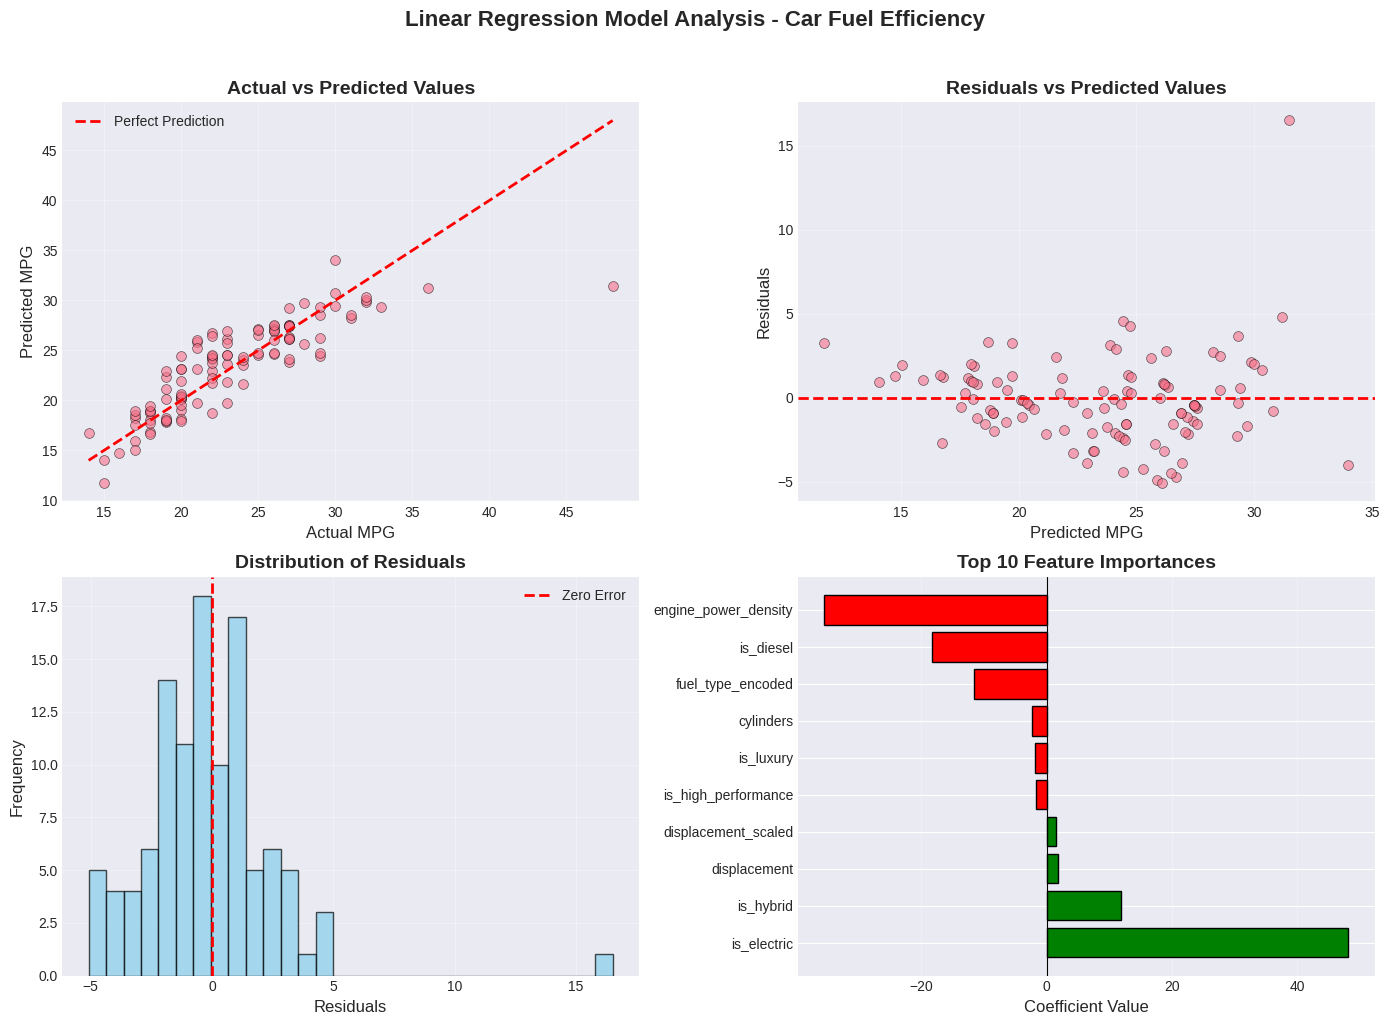

✓ Visualizations created and displayed

💾 STEP 11: SAVING RESULTS
--------------------------------------------------
✓ Predictions saved to 'linear_regression_predictions.csv'
✓ Coefficients saved to 'linear_regression_coefficients.csv'
✓ Model summary saved to 'model_summary.txt'

✅ LINEAR REGRESSION ANALYSIS COMPLETED SUCCESSFULLY!

🎯 KEY FINDINGS:
  1. Model explains 72.2% of variance in MPG
  2. Average prediction error: 2.69 MPG (±11.5%)
  3. 80.0% of predictions within ±3 MPG
  4. Most influential feature: is_electric

📂 OUTPUT FILES CREATED:
  1. linear_regression_predictions.csv - All predictions with errors
  2. linear_regression_coefficients.csv - Model coefficients
  3. model_summary.txt - Performance summary
  4. Visualization plots (displayed)

📝 INTERPRETATION:
  • Positive coefficients → Increase MPG
  • Negative coefficients → Decrease MPG
  • Larger absolute value → Stronger influence
  • Baseline MPG (intercept): 34.22

🔧 NEXT STEPS SUGGESTED:
  1. Try different targe

In [12]:
# ============================================================================
# LINEAR REGRESSION MODEL FOR CAR DATA ANALYSIS
# ============================================================================

print("="*70)
print("LINEAR REGRESSION MODEL - COMPLETE EXECUTION")
print("="*70)
print()

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("📦 STEP 1: LOADING AND PREPARING DATA")
print("-"*50)

# Load the dataset
try:
    data = pd.read_csv('Car Data P.csv')
    print(f"✓ Dataset loaded successfully")
    print(f"  Shape: {data.shape[0]} rows × {data.shape[1]} columns")
except FileNotFoundError:
    print("✗ ERROR: File 'Car Data P.csv' not found!")
    print("  Please ensure the file is in the current directory.")
    exit()

# Display basic info
print(f"\n📊 Dataset Information:")
print(f"  Columns: {len(data.columns)}")
print(f"  Missing values: {data.isnull().sum().sum()}")
print(f"  Memory usage: {data.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

print("\n🎯 STEP 2: SELECTING TARGET AND FEATURES")
print("-"*50)

# Select target variable - combination_mpg (combined fuel efficiency)
target = 'combination_mpg'
print(f"✓ Target variable selected: '{target}'")
print(f"  Target range: {data[target].min():.1f} to {data[target].max():.1f}")
print(f"  Target mean: {data[target].mean():.2f} ± {data[target].std():.2f}")

# Define features to exclude (target and related columns)
exclude_from_features = [
    target,
    'city_mpg', 'highway_mpg', 'mpg_diff',
    'combination_mpg_scaled', 'city_mpg_scaled', 'highway_mpg_scaled',
    'engine_efficiency', 'engine_efficiency_scaled'
]

# Get all feature columns
features = [col for col in data.columns if col not in exclude_from_features]
print(f"✓ Features selected: {len(features)} features")

# Separate features and target
X = data[features]
y = data[target]

print(f"\n📐 Data dimensions:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")

print("\n🔧 STEP 3: DATA CLEANING AND PREPROCESSING")
print("-"*50)

# Check for missing values
nan_count = X.isnull().sum().sum()
if nan_count > 0:
    print(f"⚠  Found {nan_count} missing values. Filling with column means...")
    X = X.fillna(X.mean())
else:
    print("✓ No missing values found")

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print(f"⚠  Found {len(non_numeric_cols)} non-numeric columns: {non_numeric_cols}")
    print("  Converting to numeric...")
    X = X.apply(pd.to_numeric, errors='coerce')
    X = X.fillna(0)
else:
    print("✓ All features are numeric")

# Check for constant columns
constant_cols = [col for col in X.columns if X[col].nunique() <= 1]
if constant_cols:
    print(f"⚠  Removing {len(constant_cols)} constant columns: {constant_cols}")
    X = X.drop(columns=constant_cols)
    features = [col for col in features if col not in constant_cols]
else:
    print("✓ No constant columns found")

print(f"\n✅ Cleaned data dimensions:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")

print("\n✂️ STEP 4: SPLITTING DATA INTO TRAINING AND TEST SETS")
print("-"*50)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"✓ Data split completed:")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")
print(f"  Features: {X_train.shape[1]}")

print("\n🤖 STEP 5: TRAINING LINEAR REGRESSION MODEL")
print("-"*50)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("✓ Model training completed successfully!")
print(f"\n📈 Model parameters:")
print(f"  Number of coefficients: {len(model.coef_)}")
print(f"  Model intercept: {model.intercept_:.4f}")
print(f"  Coefficient range: {model.coef_.min():.6f} to {model.coef_.max():.6f}")
print(f"  Mean coefficient: {model.coef_.mean():.6f}")

print("\n🔮 STEP 6: MAKING PREDICTIONS")
print("-"*50)

# Make predictions on test set
y_pred = model.predict(X_test)

print(f"✓ Predictions generated for {len(y_pred)} test samples")
print(f"\n📋 Sample predictions (first 5):")
print("  Index |  Actual  | Predicted |   Error   ")
print("  " + "-"*40)
for i in range(min(5, len(y_pred))):
    actual = y_test.iloc[i]
    predicted = y_pred[i]
    error = predicted - actual
    print(f"  {i+1:5d} | {actual:8.2f} | {predicted:9.2f} | {error:9.2f}")

print("\n📊 STEP 7: EVALUATING MODEL PERFORMANCE")
print("-"*50)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📏 PERFORMANCE METRICS:")
print("  " + "="*35)
print(f"  {'Metric':<30} {'Value':<10}")
print(f"  {'-'*30} {'-'*10}")
print(f"  {'R-squared (R²)':<30} {r2:.4f}")
print(f"  {'Mean Squared Error (MSE)':<30} {mse:.4f}")
print(f"  {'Root Mean Squared Error (RMSE)':<30} {rmse:.4f}")
print(f"  {'Mean Absolute Error (MAE)':<30} {mae:.4f}")

# Additional statistics
mean_actual = y_test.mean()
rmse_percentage = (rmse / mean_actual) * 100
r2_percentage = r2 * 100

print(f"\n📈 INTERPRETATION:")
print(f"  • R² = {r2:.4f}: Model explains {r2_percentage:.1f}% of variance")
print(f"  • RMSE = {rmse:.2f}: Average prediction error")
print(f"  • Error relative to mean: ±{rmse_percentage:.1f}%")

print("\n🔍 STEP 8: ANALYZING MODEL COEFFICIENTS")
print("-"*50)

# Create coefficient dataframe
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Value': np.abs(model.coef_)
}).sort_values('Abs_Value', ascending=False)

print(f"📋 TOP 10 MOST INFLUENTIAL FEATURES:")
print("  " + "="*55)
print(f"  {'Rank':<4} {'Feature':<35} {'Coefficient':<15}")
print(f"  {'-'*4} {'-'*35} {'-'*15}")
for i, (idx, row) in enumerate(coefficients_df.head(10).iterrows(), 1):
    sign = "+" if row['Coefficient'] >= 0 else ""
    print(f"  {i:<4} {row['Feature']:<35} {sign}{row['Coefficient']:>14.6f}")

# Count positive vs negative coefficients
positive = (coefficients_df['Coefficient'] > 0).sum()
negative = (coefficients_df['Coefficient'] < 0).sum()
zero = (coefficients_df['Coefficient'] == 0).sum()

print(f"\n📊 COEFFICIENT SUMMARY:")
print(f"  Positive coefficients: {positive} (increase MPG)")
print(f"  Negative coefficients: {negative} (decrease MPG)")
print(f"  Zero coefficients: {zero}")

print("\n📉 STEP 9: RESIDUAL ANALYSIS")
print("-"*50)

# Calculate residuals
residuals = y_test - y_pred

print(f"📋 RESIDUAL STATISTICS:")
print(f"  Mean of residuals: {residuals.mean():.4f}")
print(f"  Std of residuals: {residuals.std():.4f}")
print(f"  Min residual: {residuals.min():.4f}")
print(f"  Max residual: {residuals.max():.4f}")
print(f"  Range: {residuals.max() - residuals.min():.4f}")

# Check prediction accuracy within thresholds
print(f"\n🎯 PREDICTION ACCURACY:")
for threshold in [1, 2, 3, 5]:
    within = (abs(residuals) <= threshold).sum()
    percentage = (within / len(residuals)) * 100
    print(f"  Within ±{threshold} MPG: {within}/{len(residuals)} ({percentage:.1f}%)")

print("\n📊 STEP 10: VISUALIZING RESULTS")
print("-"*50)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Actual vs Predicted
axes[0, 0].scatter(y_test, y_pred, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual MPG', fontsize=12)
axes[0, 0].set_ylabel('Predicted MPG', fontsize=12)
axes[0, 0].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. Residuals plot
axes[0, 1].scatter(y_pred, residuals, alpha=0.6, s=50, edgecolor='black', linewidth=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted MPG', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)
axes[0, 1].set_title('Residuals vs Predicted Values', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of residuals
axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1, 0].axvline(x=0, color='r', linestyle='--', linewidth=2, label='Zero Error')
axes[1, 0].set_xlabel('Residuals', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# 4. Top feature importance
top_10 = coefficients_df.head(10).sort_values('Coefficient', ascending=True)
colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]
bars = axes[1, 1].barh(range(len(top_10)), top_10['Coefficient'], color=colors, edgecolor='black')
axes[1, 1].set_yticks(range(len(top_10)))
axes[1, 1].set_yticklabels(top_10['Feature'])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xlabel('Coefficient Value', fontsize=12)
axes[1, 1].set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].axvline(x=0, color='black', linewidth=0.8)

plt.suptitle('Linear Regression Model Analysis - Car Fuel Efficiency',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✓ Visualizations created and displayed")

print("\n💾 STEP 11: SAVING RESULTS")
print("-"*50)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_MPG': y_test.values,
    'Predicted_MPG': y_pred,
    'Residual': residuals,
    'Absolute_Error': abs(residuals),
    'Percentage_Error': (abs(residuals) / y_test.values) * 100
})
predictions_df.to_csv('linear_regression_predictions.csv', index=False)
print("✓ Predictions saved to 'linear_regression_predictions.csv'")

# Save coefficients
coefficients_df.to_csv('linear_regression_coefficients.csv', index=False)
print("✓ Coefficients saved to 'linear_regression_coefficients.csv'")

# Save model summary
with open('model_summary.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("LINEAR REGRESSION MODEL SUMMARY\n")
    f.write("="*60 + "\n\n")
    f.write(f"Target Variable: {target}\n")
    f.write(f"Number of Features: {len(features)}\n")
    f.write(f"Training Samples: {X_train.shape[0]}\n")
    f.write(f"Test Samples: {X_test.shape[0]}\n\n")
    f.write("PERFORMANCE METRICS:\n")
    f.write(f"  R-squared (R²): {r2:.4f}\n")
    f.write(f"  MSE: {mse:.4f}\n")
    f.write(f"  RMSE: {rmse:.4f}\n")
    f.write(f"  MAE: {mae:.4f}\n\n")
    f.write("TOP 5 FEATURES:\n")
    for i, row in coefficients_df.head(5).iterrows():
        f.write(f"  {row['Feature']}: {row['Coefficient']:.6f}\n")
print("✓ Model summary saved to 'model_summary.txt'")

print("\n" + "="*70)
print("✅ LINEAR REGRESSION ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*70)

print("\n🎯 KEY FINDINGS:")
print(f"  1. Model explains {r2_percentage:.1f}% of variance in MPG")
print(f"  2. Average prediction error: {rmse:.2f} MPG (±{rmse_percentage:.1f}%)")
print(f"  3. {((abs(residuals) <= 3).sum() / len(residuals) * 100):.1f}% of predictions within ±3 MPG")
print(f"  4. Most influential feature: {coefficients_df.iloc[0]['Feature']}")

print("\n📂 OUTPUT FILES CREATED:")
print("  1. linear_regression_predictions.csv - All predictions with errors")
print("  2. linear_regression_coefficients.csv - Model coefficients")
print("  3. model_summary.txt - Performance summary")
print("  4. Visualization plots (displayed)")

print("\n📝 INTERPRETATION:")
print("  • Positive coefficients → Increase MPG")
print("  • Negative coefficients → Decrease MPG")
print("  • Larger absolute value → Stronger influence")
print(f"  • Baseline MPG (intercept): {model.intercept_:.2f}")

print("\n🔧 NEXT STEPS SUGGESTED:")
print("  1. Try different target variables (city_mpg, highway_mpg)")
print("  2. Experiment with feature selection")
print("  3. Try regularization (Ridge/Lasso regression)")
print("  4. Compare with other algorithms (Random Forest, XGBoost)")